In [268]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
# Path to data
root_path = Path().cwd().parent
data_path = root_path / 'data' / 'processed3'
# List of files
import sys
EPS = sys.float_info.epsilon

In [385]:
anomaly = np.load(data_path / 'anomaly.npy')
freq = np.load(data_path / 'freq.npy')
PSDs = np.load(data_path / 'psds.npy')
system_name = np.load(data_path / 'labels.npy')
states = np.load(data_path / 'states.npy')
anomaly = np.load(data_path / 'anomaly.npy')
latent = np.load(data_path / 'latent.npy')
resonance_freq = np.load(data_path / 'resonance_freq.npy')

[autoreload of PBSHM_mdof.models.classification.dense_nn failed: Traceback (most recent call last):
  File "/home/yacine/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/yacine/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/yacine/miniconda3/envs/PBSHM_mdofenv/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/yacine/Documents/PhD/Code/LocalProject/PBSHM_mdof/PBSHM_mdof/models/classificat

In [386]:
nan_index = np.unique(np.where(np.isnan(PSDs))[0])

In [387]:
nan_index

array([], dtype=int64)

In [388]:
PSDs=np.delete(PSDs,nan_index,axis=0)
anomaly=np.delete(anomaly,nan_index,axis=0)
system_name=np.delete(system_name,nan_index,axis=0)

states=np.delete(states,nan_index,axis=0)
latent=np.delete(latent,nan_index,axis=0)
resonance_freq=np.delete(resonance_freq,nan_index,axis=0)

In [389]:
mean_RMS = (1/2*np.pi)*np.sum(PSDs,axis=-1).mean(axis=-1)

In [390]:
from scipy import signal

n_sample = int(30/0.0025)



In [391]:
anomaly

array([0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ])

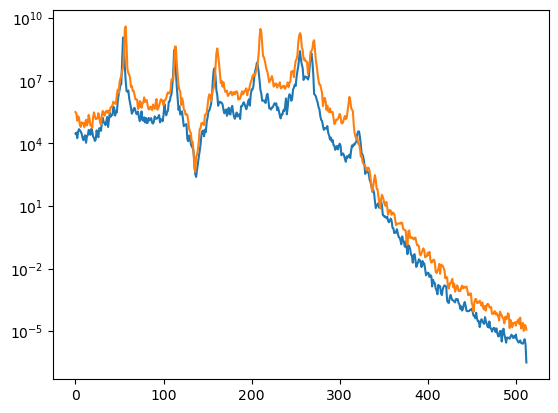

In [392]:
plt.plot(PSDs[0])
plt.plot(PSDs[1])
plt.yscale('log')

In [394]:
SNR = 1
noise = np.random.normal(0,SNR*mean_RMS/n_sample,(n_sample,))

noise_freq = signal.welch(noise,1/0.0025,nperseg=2048,scaling='spectrum')[1]
PSDs_noisy = PSDs + noise_freq


ValueError: operands could not be broadcast together with shapes (52000,513) (1025,) 

NameError: name 'PSDs_noisy' is not defined

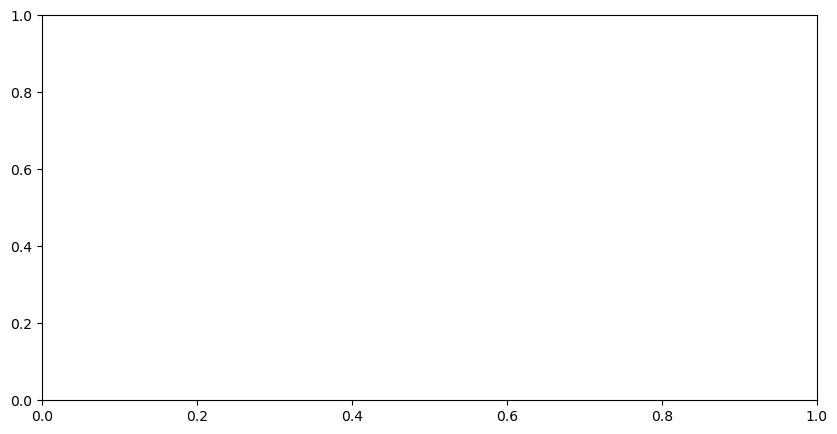

In [395]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(PSDs_noisy[0],label='noisy',alpha=0.5)
ax.plot(PSDs[1],label='clean',alpha=0.5)
ax.plot(noise_freq[0],label='noise',alpha=1)
ax.set_yscale('log')
ax.legend()

In [97]:
PSDs =  PSDs_noisy[:,0:250]

NameError: name 'PSDs_noisy' is not defined

In [237]:
np.unique(anomaly)

array([0.  , 0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13])

In [238]:
np.sum(system_name=='system_0')

2600

In [273]:
idx_healty = np.where((system_name=='system_0')&(states=='healthy'))[0]

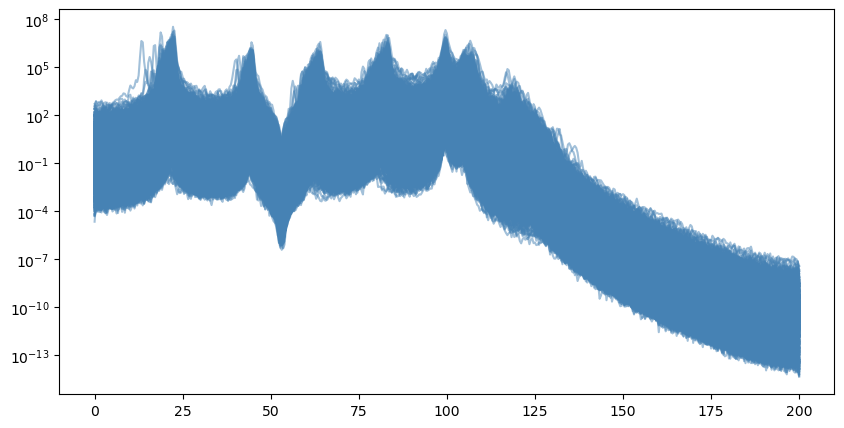

In [274]:
plt.figure(figsize=(10,5))
plt.plot(freq,PSDs[idx_healty].T,label='healthy',color='steelblue',alpha=0.5)
plt.yscale('log')


In [275]:
np.unique(anomaly)

array([0.  , 0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13])

In [277]:
np.quantile(latent,0.5)

50.06964787457361

(array([  20.,   40.,   20.,   40.,  100.,  360.,  480.,  740., 1000.,
        1540., 2180., 2520., 3080., 3880., 4140., 4140., 4400., 4160.,
        4160., 3640., 3080., 2320., 1800., 1460.,  900.,  760.,  320.,
         320.,  260.,  140.]),
 array([-57.05583601, -50.52572538, -43.99561475, -37.46550411,
        -30.93539348, -24.40528285, -17.87517222, -11.34506159,
         -4.81495096,   1.71515968,   8.24527031,  14.77538094,
         21.30549157,  27.8356022 ,  34.36571283,  40.89582347,
         47.4259341 ,  53.95604473,  60.48615536,  67.01626599,
         73.54637662,  80.07648726,  86.60659789,  93.13670852,
         99.66681915, 106.19692978, 112.72704041, 119.25715105,
        125.78726168, 132.31737231, 138.84748294]),
 <BarContainer object of 30 artists>)

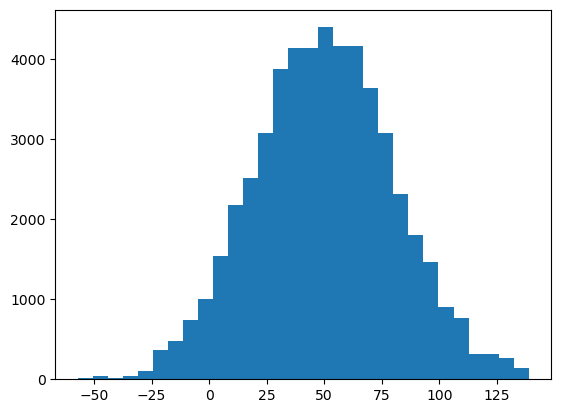

In [278]:
plt.hist(latent,bins=30)

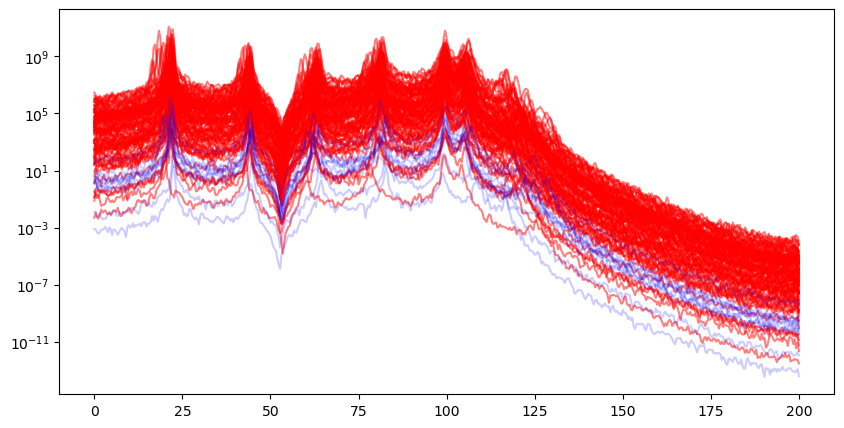

In [279]:
fig,ax= plt.subplots(figsize=(10,5))
counter_1 = 0
counter_2 = 0
counter_3 = 0

for i in range(0,48000,1):
    if system_name[i] == 'system_0':
        if states[i]=='healthy' and counter_1 <10 :            
            ax.semilogy(freq,PSDs[i],label='healthy',alpha=0.2,color='blue')
            counter_1 +=1
        elif states[i]=='anomalous' and counter_2 <100 and anomaly[i] == 0.13:
            ax.semilogy(freq,PSDs[i],label='anoumalous',alpha=0.5,color='red')
            counter_2 +=1



In [280]:
PSDs

array([[2.93312873e+04, 3.33506826e+04, 1.79655908e+04, ...,
        4.07080983e-06, 2.40621973e-06, 3.12439704e-07],
       [3.19758426e+05, 2.70135442e+05, 1.22916004e+05, ...,
        1.96007451e-05, 1.86184035e-05, 1.18298108e-05],
       [3.56564152e+03, 2.73784005e+03, 3.58846431e+02, ...,
        3.72358114e-07, 1.65694700e-07, 7.84713170e-08],
       ...,
       [8.10488326e+00, 1.84579065e+01, 2.06617665e+01, ...,
        1.79140633e-09, 2.63362223e-09, 1.16180031e-09],
       [1.00298567e-04, 2.65611536e-04, 1.87076901e-04, ...,
        3.36739805e-14, 6.37578256e-14, 3.66924750e-14],
       [2.93023973e-04, 1.17953004e-03, 1.15603684e-03, ...,
        9.82705390e-14, 1.99085040e-13, 1.23185028e-13]])

In [281]:
PSDs = np.log10(PSDs+EPS)


In [282]:
labels_name = {f'system_{i}' : i for i in range(0,20)}
def vec_translate(a, my_dict):    
    return np.vectorize(my_dict.__getitem__)(a)
system_name = vec_translate(system_name,labels_name)


In [283]:
print(f'amount of healthy samples {np.sum(states=="healthy")/len(states)} and amount of anomalous samples {np.sum(states=="anomalous")/len(states)}')


amount of healthy samples 0.46153846153846156 and amount of anomalous samples 0.5384615384615384


In [255]:
idx_healty

array([28000, 28001, 28002, ..., 29197, 29198, 29199])

In [284]:
healthy_idx = np.where(states=='healthy')[0]
anomalous_idx = np.where(states=='anomalous')[0]

train_idx = np.random.choice(healthy_idx, size=min(healthy_idx.size,20*500), replace=False)
test_idx = np.setdiff1d(healthy_idx, train_idx)


In [285]:
healthy_idx

array([28000, 28001, 28002, ..., 51997, 51998, 51999])

In [286]:
PSDs_healthy = PSDs[healthy_idx]
system_name_healthy = system_name[healthy_idx]

PSDs_healthy_train = PSDs[train_idx]
system_name_healthy_train = system_name[train_idx]

PSDs_healthy_test = PSDs[test_idx]
system_name_healthy_test = system_name[test_idx]

In [287]:
PSDs_anomalous = PSDs[anomalous_idx]
system_name_anomalous = system_name[anomalous_idx]
anomaly_anomalous  = anomaly[anomalous_idx]

In [288]:
min_tr = PSDs_healthy_train.min()
max_tr = PSDs_healthy_train.max()
def normalize(data,min_value,max_value):
    return (data-min_value)/(max_value-min_value)



In [289]:
PSDs_healthy_train_nr = normalize(PSDs_healthy_train,min_tr,max_tr)[:,:600]
PSDs_healthy_test_nr = normalize(PSDs_healthy_test,min_tr,max_tr)[:,:600]
PSDs_anomalous_nr = normalize(PSDs_anomalous,min_tr,max_tr)[:,:600]

print(f'shapes :\n PSDs_healthy_train = {PSDs_healthy_train_nr.shape} \n PSDs_healthy_test = {PSDs_healthy_test_nr.shape} \n PSDs_anomalous = {PSDs_anomalous_nr.shape}')

shapes :
 PSDs_healthy_train = (10000, 513) 
 PSDs_healthy_test = (14000, 513) 
 PSDs_anomalous = (28000, 513)


In [290]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(system_name_healthy_train.reshape(-1,1))
system_name_healthy_train_enc = enc.transform(system_name_healthy_train.reshape(-1,1)).toarray()


In [336]:
from PBSHM_mdof.models.classification.dense_nn import DenseSignalClassifier
from PBSHM_mdof.models.loss_function.arcface import ArcFaceLoss
model_ = DenseSignalClassifier(inputDim=(PSDs_healthy_train_nr.shape[-1],), 
num_class=20,dense_layers=[128,64,32,32])
model=model_.build_model()

In [292]:
from PBSHM_mdof.models.classification.conv_nn import ConvSignalClassifier
model = ConvSignalClassifier(inputDim=(PSDs_healthy_train_nr.shape[-1],1),num_class=20,
                             conv_layers=[(32,7),(64,7),(128,7)],
                                dense_layers=[128,128,64,32,32])
model =model.build_model()

In [337]:
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 513)]             0         
                                                                 
 dense_signal_classifier_25   (None, 20)               77844     
 (DenseSignalClassifier)                                         
                                                                 
Total params: 77,844
Trainable params: 77,844
Non-trainable params: 0
_________________________________________________________________


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


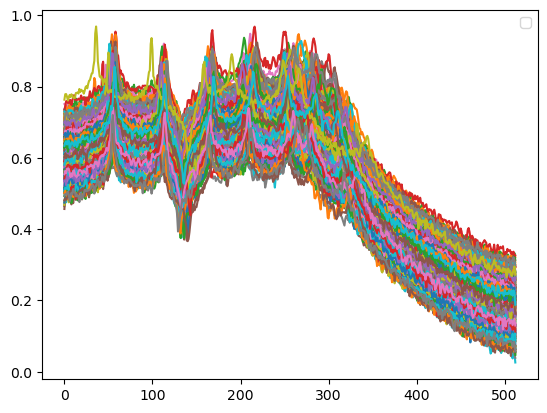

In [381]:
plt.plot(PSDs_healthy_train_nr[:200].T)
plt.legend()

In [339]:
PSDs_healthy_train_nr

array([[0.67485569, 0.67664118, 0.68003801, ..., 0.23760586, 0.23121409,
        0.19995745],
       [0.67710435, 0.67933422, 0.68564823, ..., 0.23961763, 0.22033093,
        0.20616445],
       [0.63423566, 0.64511273, 0.64191026, ..., 0.21637383, 0.20263743,
        0.16656782],
       ...,
       [0.66838092, 0.67073514, 0.67183346, ..., 0.24202201, 0.24231616,
        0.23197655],
       [0.57801501, 0.58971524, 0.59670368, ..., 0.15961182, 0.16112017,
        0.15929312],
       [0.5456823 , 0.56123412, 0.57058636, ..., 0.14227002, 0.15915199,
        0.15262171]])

In [359]:
hist=model.fit(PSDs_healthy_train_nr, system_name_healthy_train_enc, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500
125/125 [==============================] - 1s 10ms/step - loss: 0.1961 - accuracy: 0.9460 - val_loss: 0.1987 - val_accuracy: 0.9400
Epoch 2/500
125/125 [==============================] - 2s 18ms/step - loss: 0.1752 - accuracy: 0.9524 - val_loss: 0.1921 - val_accuracy: 0.9385
Epoch 3/500
125/125 [==============================] - 1s 12ms/step - loss: 0.3715 - accuracy: 0.8865 - val_loss: 0.3275 - val_accuracy: 0.8795
Epoch 4/500
125/125 [==============================] - 1s 11ms/step - loss: 0.1833 - accuracy: 0.9477 - val_loss: 0.1726 - val_accuracy: 0.9540
Epoch 5/500
125/125 [==============================] - 1s 10ms/step - loss: 0.2143 - accuracy: 0.9361 - val_loss: 0.2631 - val_accuracy: 0.9185
Epoch 6/500
125/125 [==============================] - 1s 11ms/step - loss: 0.2442 - accuracy: 0.9202 - val_loss: 0.3359 - val_accuracy: 0.8915
Epoch 7/500
125/125 [==============================] - 1s 8ms/step - loss: 0.2626 - accuracy: 0.9154 - val_loss: 0.2903 - val_accuracy: 

KeyboardInterrupt: 

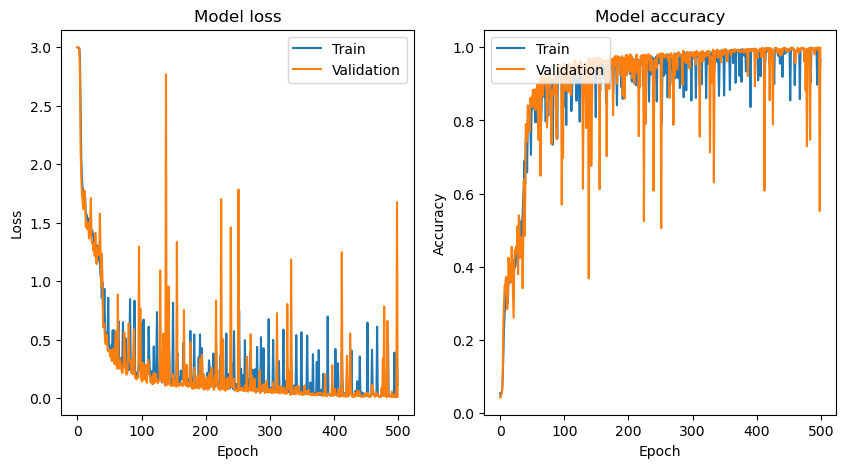

In [301]:
def plot_history(history, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper right')
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

plot_history(hist)
plt.show()

In [351]:
from sklearn.metrics import roc_auc_score
def compute_auc(data_normal,data_anoamly):

    confidence_anomaly_0 = data_normal['confidence']
    confidence_rest_of_anomalies = data_anoamly['confidence']

    # create the labels for the data
    # 1 for anomaly 0 and 0 for the rest of anomalies
    labels_anomaly_0 = [1] * len(confidence_anomaly_0)
    labels_rest_of_anomalies = [0] * len(confidence_rest_of_anomalies)

    # concatenate the data and labels
    confidence = np.concatenate((confidence_anomaly_0, confidence_rest_of_anomalies))
    labels = np.concatenate((labels_anomaly_0, labels_rest_of_anomalies))

    # compute the AUC
    auc = roc_auc_score(labels, confidence)
    return auc

def metric_auc(df_plot):
    df_result= pd.DataFrame({'anomaly':[],'auc':[]})
    df_plot_sys0 = df_plot[df_plot['system name']==0]

    train_healthy = df_plot_sys0[df_plot_sys0['test']==0]
    test_healthy = df_plot_sys0[(df_plot_sys0['test']==1)&(df_plot_sys0['anomaly']==0)]
    auc_tr_ts = compute_auc(train_healthy,test_healthy)
    df_result = df_result.append({'anomaly':0,'auc':auc_tr_ts},ignore_index=True)
    for anomaly_level in df_plot_sys0['anomaly'].unique():
        if anomaly_level>0:
            test_anomaly = df_plot_sys0[(df_plot_sys0['test']==1)&(df_plot_sys0['anomaly']==anomaly_level)]
            auc_tr_ts = compute_auc(test_healthy,test_anomaly)
            df_result = pd.concat([df_result, pd.DataFrame({'anomaly': [anomaly_level], 'auc': [auc_tr_ts]})], ignore_index=True)
    return df_result

def metric_plot(df_plot):
    fig,ax= plt.subplots(1,1,figsize=(10,5))
    df_sorted = df_plot[df_plot['system name']==0].sort_values(by=['test','anomaly']).reset_index(drop=True)    
    df_sorted[df_sorted['test']==0].plot(ax=ax,y='confidence',linestyle='',marker='.',figsize=(10,5),alpha=1,color='green')
    df_sorted[df_sorted['test']==1].plot(ax=ax,y='confidence',linestyle='',marker='.',figsize=(10,5),alpha=0.5,color='red')
    for i in range(0,8):
        if i == 0:
            ax.axvline(x=500+200*i,color='steelblue',linestyle='--',alpha=0.5)
            ax.text(500+200*i,0.3,'Test healthy ',rotation=90)
        else :
            ax.axvline(x=1000+200*i,color='steelblue',linestyle='--',alpha=0.5)
            ax.text(1000+200*i,0.3,'Anomaly = '+str((i*2-1))+'%',rotation=90)
    ax.set_xlabel('Index')
    ax.set_ylabel('Confidence')
    ax.set_title('Confidence of healthy and anomaly data')
    return fig 

def metric_plot_2(df_plot):
    fig,ax= plt.subplots(1,1,figsize=(10,5))
    df_sorted = df_plot[df_plot['system name']==0].sort_values(by=['test','anomaly']).reset_index(drop=True)
    df_sorted=df_sorted.rolling(10).apply(lambda x: np.power(np.prod(x),1/10))
    df_sorted[df_sorted['test']==0].plot(ax=ax,y='confidence',linestyle='',marker='.',figsize=(10,5),alpha=1,color='green')
    df_sorted[df_sorted['test']==1].plot(ax=ax,y='confidence',linestyle='',marker='.',figsize=(10,5),alpha=0.5,color='red')
    for i in range(0,8):
        if i == 0:
            ax.axvline(x=500+200*i,color='steelblue',linestyle='--',alpha=0.5)
            ax.text(500+200*i,0.3,'Test healthy ',rotation=90)
        else :
            ax.axvline(x=1000+200*i,color='steelblue',linestyle='--',alpha=0.5)
            ax.text(1000+200*i,0.3,'Anomaly = '+str((i*2-1))+'%',rotation=90)
    ax.set_xlabel('Index')
    ax.set_ylabel('Confidence')
    ax.set_title('Confidence of healthy and anomaly data')
    return fig 


    

In [352]:
PSDs_nr = normalize(PSDs,min_tr ,  max_tr)

In [353]:
system_name_enc = enc.transform(system_name.reshape(-1,1)).toarray()

In [360]:
score = model.predict(PSDs_nr)
confidence = score[np.ma.array(score, mask=system_name_enc).mask]
df_plot = pd.DataFrame({'system name':system_name,'confidence':confidence,'anomaly':anomaly})
df_plot['test'] = 1
df_plot.loc[train_idx,'test']=0 

1625/1625 [==============================] - 8s 5ms/step


In [361]:
system_0_index = np.where(system_name==0)[0]

In [384]:
resonance_freq.[,]

(52000, 20, 8)

In [371]:
system_0_index = np.where(system_name==0)[0]

In [380]:
resonance_freq[1] == resonance_freq[25]

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  Tr

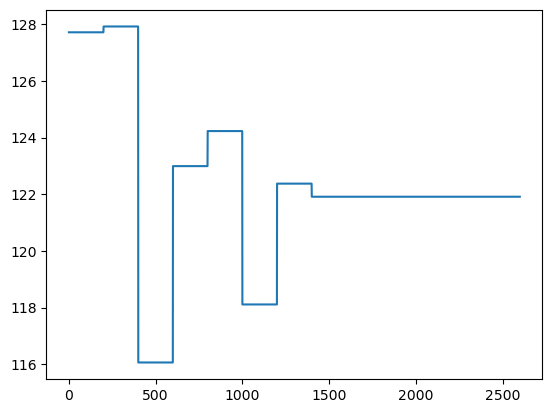

In [372]:
plt.plot(resonance_freq[system_0_index,0,0])

   anomaly       auc
0     0.00  0.501336
1     0.01  0.533687
2     0.03  0.586342
3     0.05  0.737698
4     0.07  0.899957
5     0.09  0.950483
6     0.11  0.978139
7     0.13  0.971696


/tmp/ipykernel_117153/1378011843.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'anomaly':0,'auc':auc_tr_ts},ignore_index=True)


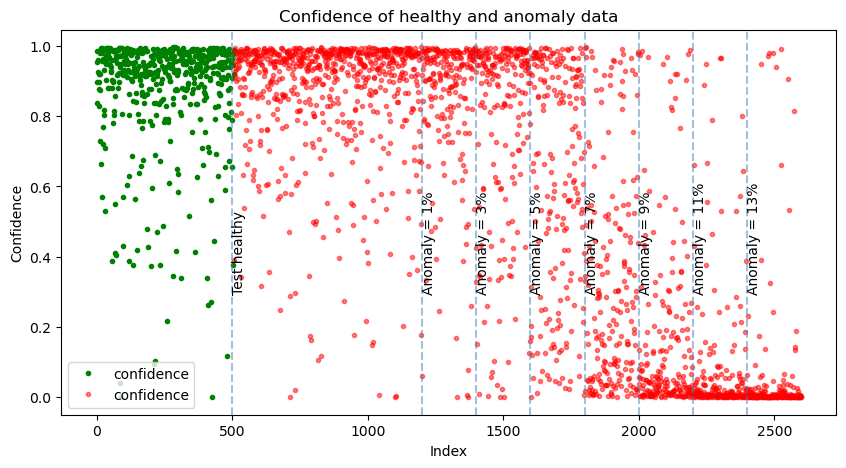

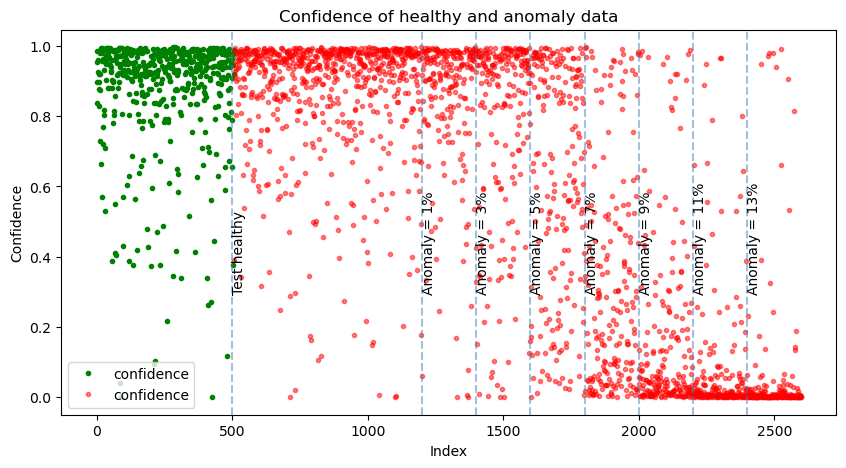

In [363]:
# SNR = 12 / fs = 50
print(metric_auc(df_plot))
metric_plot(df_plot)

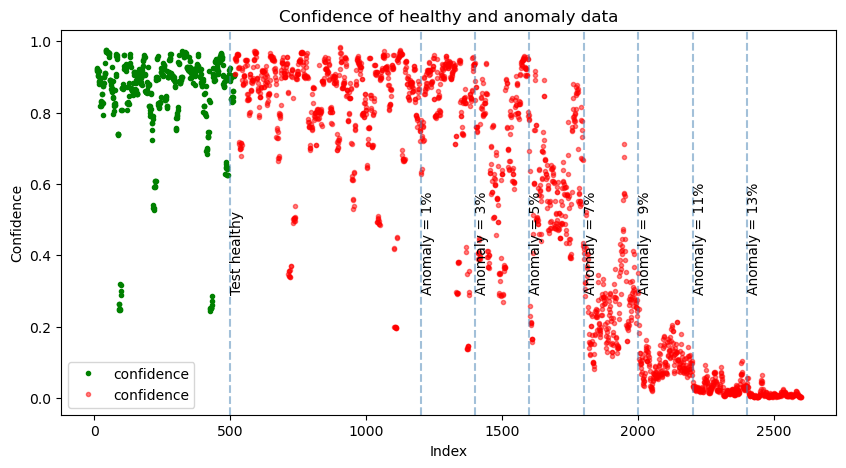

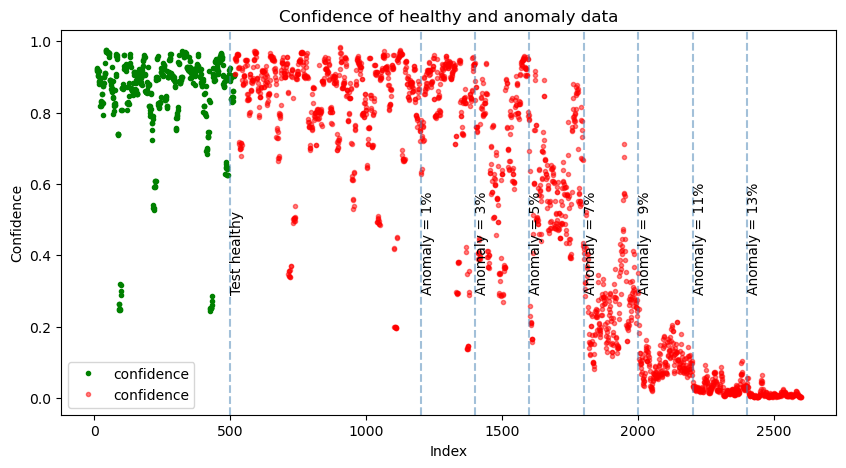

In [358]:
metric_plot_2(df_plot)

In [158]:
system_0_idx = np.where(system_name==0)[0]
system_0_idx_train = np.intersect1d(system_0_idx,train_idx)
system_0_idx_test = np.intersect1d(system_0_idx,test_idx)

In [163]:
score_sys_1=score[system_0_idx_test][:,0]
latent_sys_1 = latent[system_0_idx_test]

(array([  4.,  22.,  36., 104., 166., 176., 129.,  51.,  18.,   4.]),
 array([-50.47557898, -30.99761678, -11.51965458,   7.95830762,
         27.43626982,  46.91423202,  66.39219422,  85.87015643,
        105.34811863, 124.82608083, 144.30404303]),
 <BarContainer object of 10 artists>)

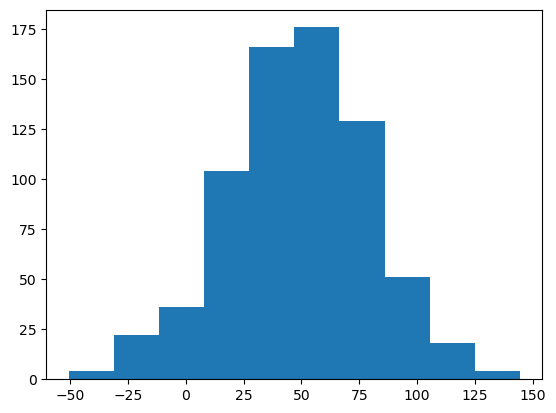

In [168]:
plt.hist(latent_sys_1)

(array([  1.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   2.,   2.,   1.,   0.,   3.,   0.,   3.,
          6.,   3.,   1.,   5.,   3.,   1.,   2.,   5.,   5.,   4.,   3.,
         10.,   9.,  13.,   4.,   5.,   9.,   9.,   9.,   7.,  16.,  12.,
         29.,  24.,  39.,  53., 132., 274.]),
 array([0.05710223, 0.07594125, 0.09478027, 0.11361928, 0.1324583 ,
        0.15129733, 0.17013635, 0.18897536, 0.20781438, 0.2266534 ,
        0.24549241, 0.26433143, 0.28317046, 0.30200946, 0.32084849,
        0.33968753, 0.35852653, 0.37736556, 0.39620456, 0.41504359,
        0.43388262, 0.45272163, 0.47156066, 0.49039966, 0.50923866,
        0.52807772, 0.54691672, 0.56575572, 0.58459479, 0.60343379,
        0.62227279, 0.64111179, 0.65995085, 0.67878985, 0.69762886,
        0.71646792, 0.73530692, 0.75414592, 0.77298498, 0.79182398,
        0.81066298, 0.82950199, 0.84834105, 0.86718005, 0.88601905,
        0.90485811, 0.92369711, 0.94253612, 0.

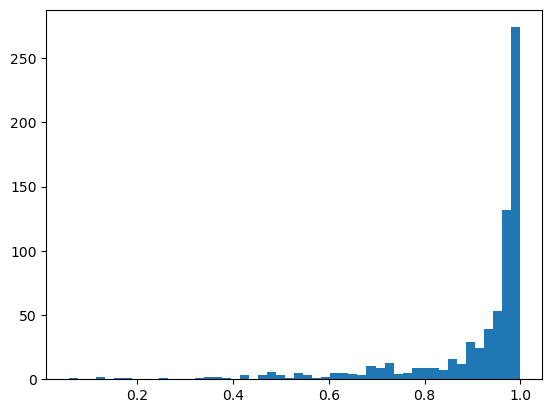

In [170]:
plt.hist(score_sys_1,bins=50)

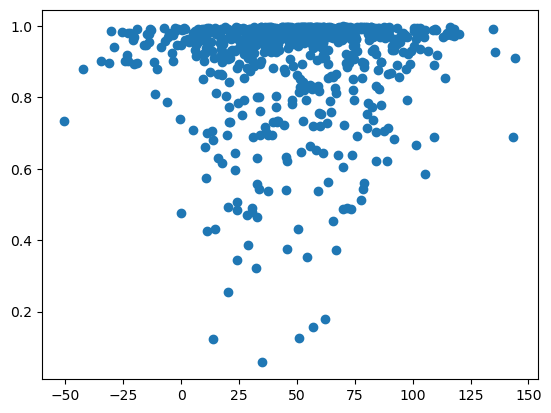

In [165]:
plt.scatter(latent_sys_1,score_sys_1)

/tmp/ipykernel_679738/2267967731.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'anomaly':0,'auc':auc_tr_ts},ignore_index=True)


   anomaly       auc
0     0.00  0.494121
1     0.01  0.472012
2     0.03  0.175321
3     0.05  0.097853
4     0.07  0.003812
5     0.09  0.855911
6     0.11  0.016461
7     0.13  0.473593


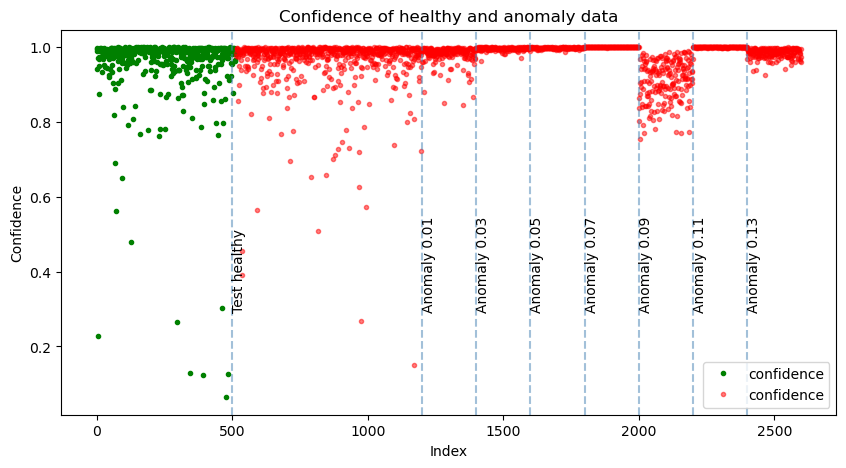

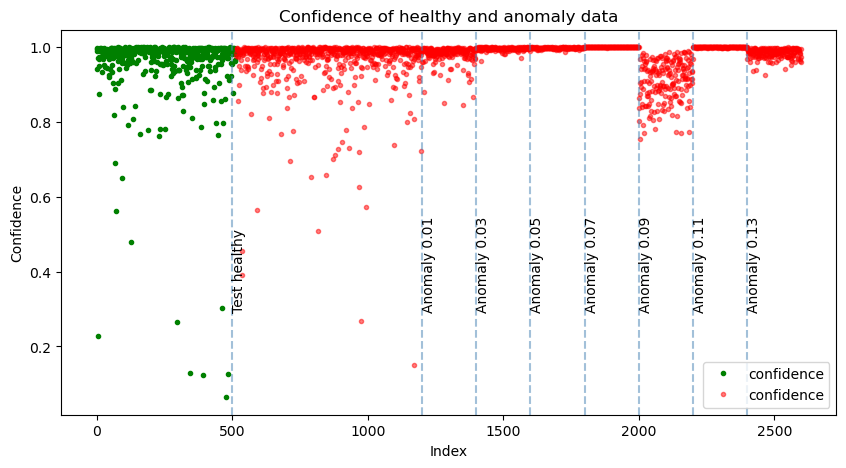

In [74]:
# noise_ fs = only the first pick 
print(metric_auc(df_plot))
metric_plot(df_plot)

In [ ]:
print(metric_auc(df_plot))
metric_plot(df_plot)

   anomaly       auc
0     0.00  0.528305
1     0.01  0.682443
2     0.03  0.996991
3     0.05  1.000000
4     0.07  1.000000
5     0.09  1.000000
6     0.11  1.000000
7     0.13  1.000000


/tmp/ipykernel_17476/936853264.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'anomaly':0,'auc':auc_tr_ts},ignore_index=True)


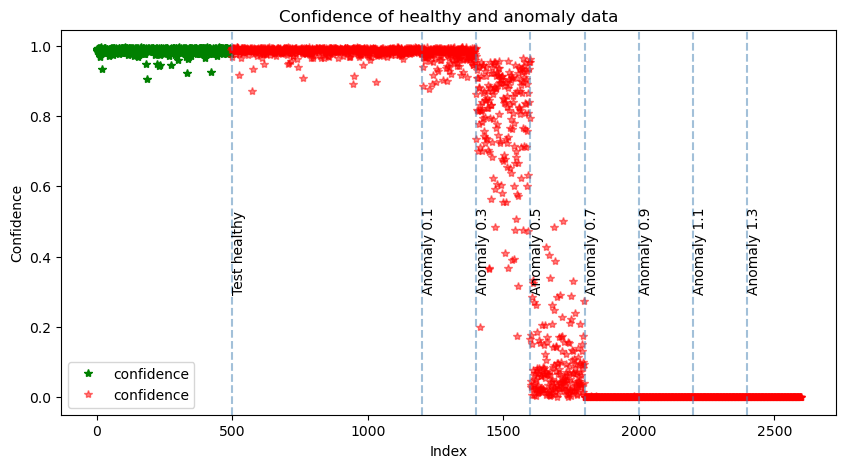

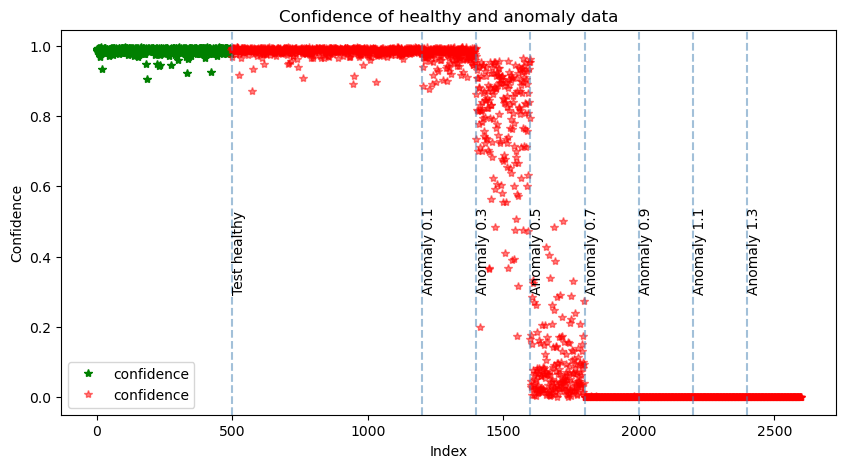

In [681]:
print(metric_auc(df_plot))
metric_plot(df_plot)

In [590]:
np.unique(np.argmax(score[np.where(system_name==0)],axis=-1))

array([ 0,  7, 11, 13])

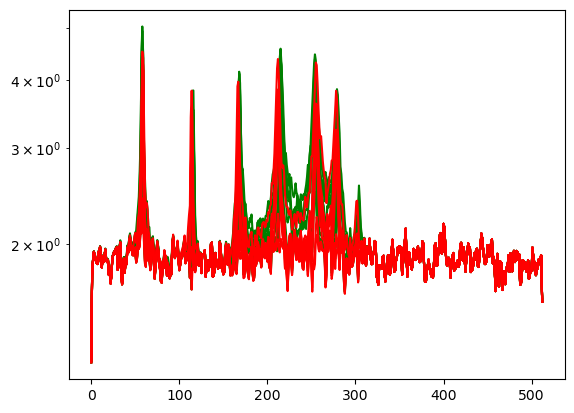

In [598]:
plt.plot(PSDs[np.where(system_name==0)][0:10].T,color='green')
plt.plot(PSDs[np.where(system_name==13)][0:10].T,color='red')
plt.yscale('log')


In [217]:
PSDs_nr=normalize(PSDs,min_tr,max_tr)

In [219]:
PSDs_nrscore = model.predict()

1625/1625 [==============================] - 9s 5ms/step


In [63]:
system_name_enc = enc.transform(system_name.reshape(-1,1)).toarray()

In [223]:
print(system_name_enc.shape)
print(score.shape)    summary.scalar('table', table_value, step=1)


(52000, 20)
(52000, 20)


In [236]:
system_name_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [380]:
confidence = score[np.ma.array(score, mask=system_name_enc).mask]
df_plot = pd.DataFrame({'system name':system_name,'confidence':confidence,'anomaly':anomaly})
df_plot['test'] = 1
df_plot.loc[train_idx,'test']=0



Text(0.5, 1.0, 'Confidence of healthy and anomaly data')

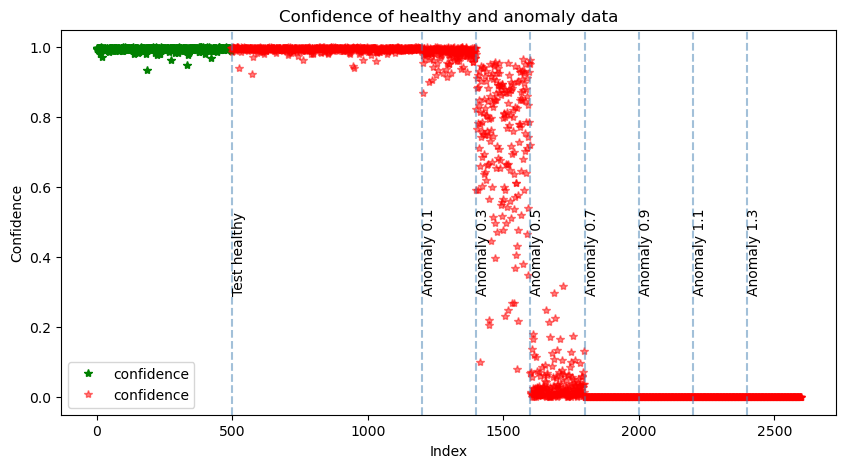

In [355]:
df_plot[df_plot['system name']==0].plot(x='anomaly',y='confidence',kind='violin',colormap='viridis')

ValueError: violin is not a valid plot kind

/tmp/ipykernel_17476/2974050766.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'anomaly':0,'auc':auc_tr_ts},ignore_index=True)


In [338]:
df_result

,anomaly,auc
0,0.00,0.528879
1,0.01,0.763375
2,0.03,0.999495
3,0.05,1.000000
4,0.07,1.000000
5,0.09,1.000000
6,0.11,1.000000
7,0.13,1.000000


In [119]:
df_plot=pd.DataFrame({'confidence' : predict_0[:,0],
              'state' : state_0 })

<AxesSubplot: xlabel='confidence', ylabel='state'>

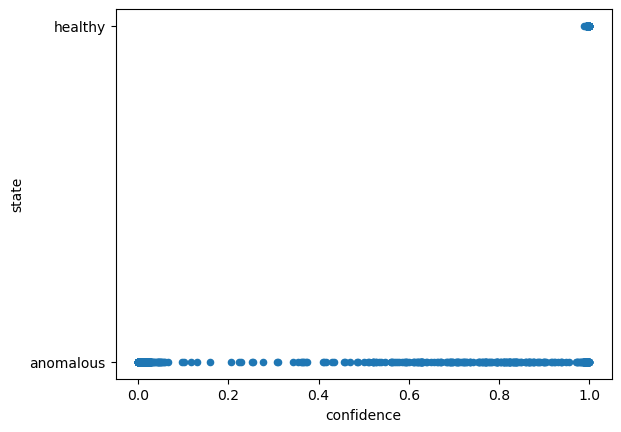

In [120]:
df_plot.plot(x='confidence',y='state',kind='scatter')


array([<AxesSubplot: title={'center': 'anomalous'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'healthy'}, ylabel='Frequency'>],
      dtype=object)

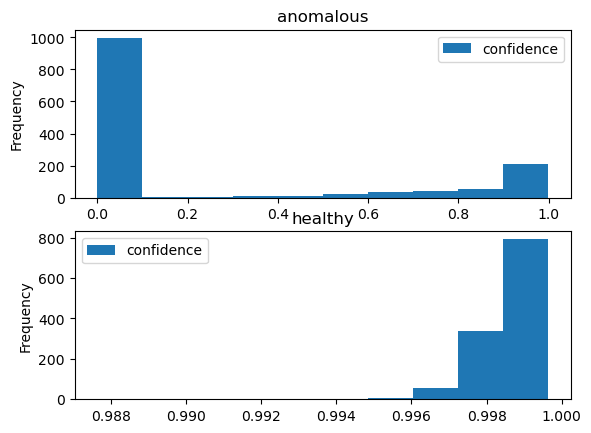

In [121]:
df_plot.plot.hist(by='state')


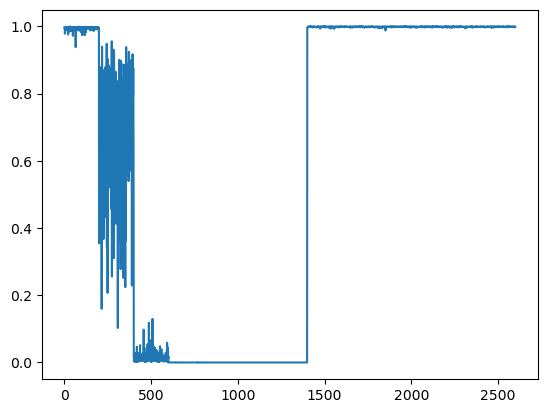

In [122]:
plt.plot(predict_0[:,0])

In [123]:
np.argmax(predict_0[1199:],axis=-1)

array([17, 17, 11, ...,  0,  0,  0])

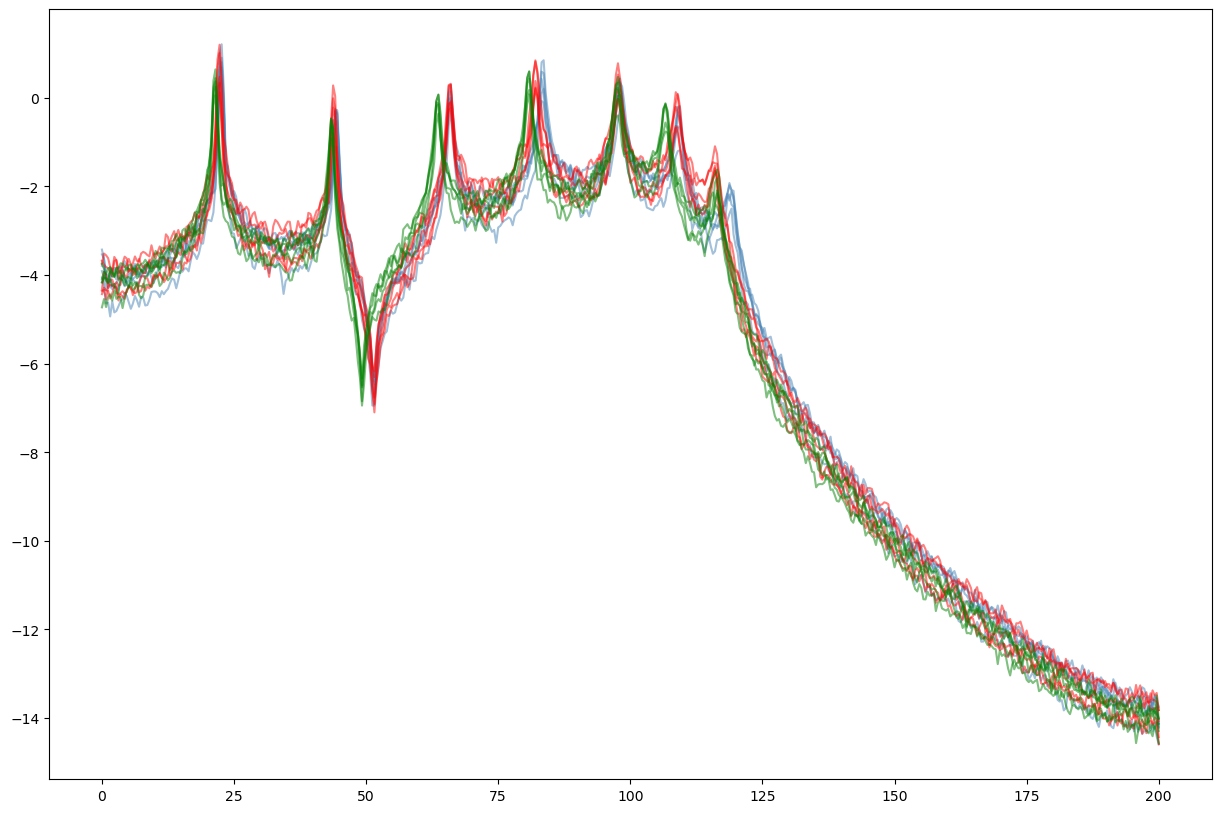

In [117]:
plt.figure(figsize=(15,10))
plt.plot(freq,PSDs[np.where((system_name==0) & (states=='healthy'))][0:5].T,color='steelblue',alpha=0.5)
plt.plot(freq,PSDs[np.where((system_name==0) & (states=='anomalous'))][0:5].T,color='red',alpha=0.5)
plt.plot(freq,PSDs[np.where((system_name==2) & (states=='anomalous'))][0:5].T,color='green',alpha=0.5)

In [ ]:
plt.plot(freq,PSDs[np.where(system_name==2)][0:10].T)